Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

🕸️ VISUALIZATION: CONCEPTUAL MAPPING NETWORK


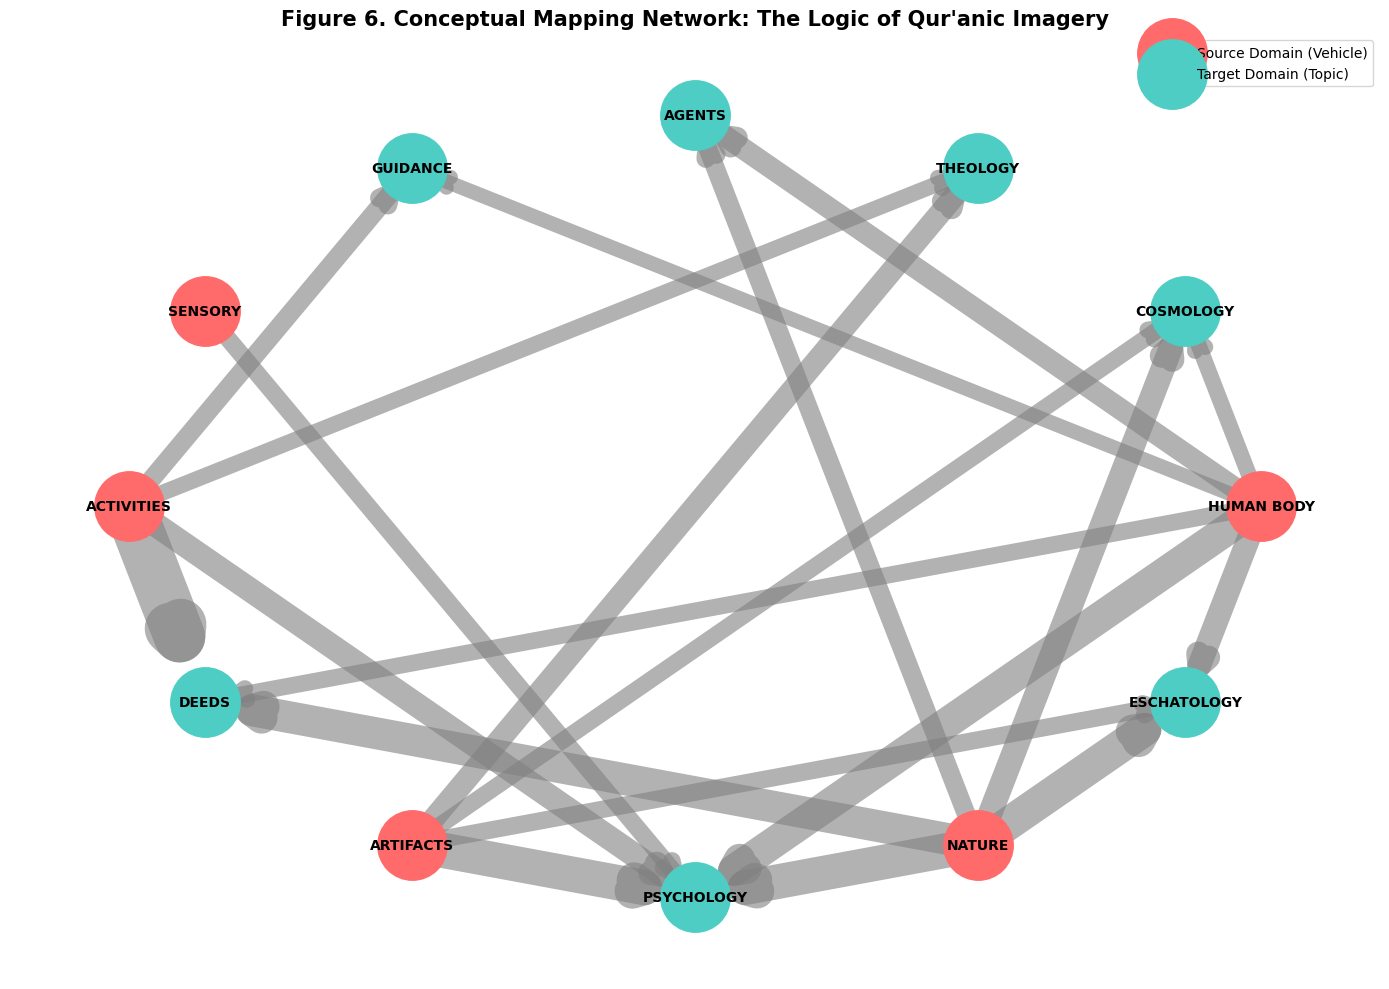


📝 [Generated Narrative for Section 4.4]:
------------------------------------------------------------
1. **Dominant Image Schema:** The analysis reveals that the **OTHER** schema is the foundational cognitive structure in the corpus.

2. **Systematic Entailment:** The strongest link connects **ACTIVITIES** to **DEEDS**.
   -> Conceptual Logic: This systematic mapping establishes the entailment that abstract deeds follows the physical laws of activities.
------------------------------------------------------------

📊 Image Schema Distribution:
Schema
OTHER                 941
CONTAINER (In-Out)      1
Name: count, dtype: int64


In [ ]:
# @title 8. تحليل الخرائط المفهومية (Network Diagram & Schema Logic)
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
from google.colab import drive

# ---------------------------------------------------------
# 1. MOUNT & LOAD
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

path_similes = '/content/drive/MyDrive/Pragmatic/corpus/similes_data.json'
path_metaphors = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

# ---------------------------------------------------------
# 2. TAXONOMY & HEURISTICS (تعريف المنطق)
# ---------------------------------------------------------

# A. Domain Mappings (نفس التصنيف الموحد السابق لضمان الاتساق)
source_main_map = {
    'NATURE': 'NATURE', 'NATURE_ELEMENTS': 'NATURE', 'NATURE_METEO_HYDRO': 'NATURE',
    'LIGHT_AND_DARKNESS': 'SENSORY', 'FIRE_AND_HEAT': 'SENSORY', 'SENSORY_PHENOMENA': 'SENSORY',
    'COMMERCE_AND_EXCHANGE': 'ACTIVITIES', 'HUMAN_ACTIVITIES': 'ACTIVITIES', 'TRAVEL_AND_PATH': 'ACTIVITIES',
    'BODY_AND_PHYSIOLOGY': 'HUMAN BODY', 'HUMAN_CONDITION': 'HUMAN BODY',
    'TOOLS_AND_ARTIFACTS': 'ARTIFACTS', 'BUILDINGS_AND_SHELTER': 'ARTIFACTS', 'HUMAN_CONSTRUCTS': 'ARTIFACTS',
    'ABSTRACT_SYSTEMS': 'ABSTRACT'
}

target_main_map = {
    'THEOLOGY': 'THEOLOGY', 'REVELATION_AND_GUIDANCE': 'GUIDANCE',
    'ESCHATOLOGY': 'ESCHATOLOGY', 'SPIRITUAL_PSYCHOLOGY': 'PSYCHOLOGY',
    'HUMAN_AGENTS_AND_GROUPS': 'AGENTS', 'DEEDS_AND_BEHAVIOR': 'DEEDS',
    'WORLDLY_LIFE': 'WORLDLY LIFE', 'COSMOLOGY_AND_NATURE': 'COSMOLOGY'
}

# B. Image Schema Detector (كاشف الخطاطات التصورية)
# يبحث في النصوص العربية عن مؤشرات المسار والاحتواء والقوة
schema_keywords = {
    'PATH (Source-Path-Goal)': ['طريق', 'سبيل', 'صراط', 'مشي', 'سير', 'خطوات', 'هداية', 'ضلال', 'مرور', 'سلك'],
    'CONTAINER (In-Out)': ['في', 'داخل', 'قلب', 'صدر', 'وعاء', 'ختم', 'طبع', 'غلاف', 'بطن', 'دخول', 'خروج', 'أحاط'],
    'FORCE (Interaction)': ['ضرب', 'ثقيل', 'حمل', 'دفع', 'قوة', 'شدة', 'سلطان', 'قهر', 'أخذ', 'بطش', 'أغلال']
}

def detect_schema(text):
    if not isinstance(text, str): return None
    text = text.lower()
    for schema, keywords in schema_keywords.items():
        for kw in keywords:
            if kw in text:
                return schema
    return 'OTHER'

# ---------------------------------------------------------
# 3. DATA EXTRACTION
# ---------------------------------------------------------
rows = []

def process_file(path):
    try:
        with open(path, 'r', encoding='utf-8') as f:
            records = json.load(f)
        for rec in records:
            # Check rhetorical structure
            items = rec.get('rhetorical_analysis', {}).get('similes', [])
            if not items:
                items = rec.get('rhetorical_analysis', {}).get('metaphors', []) # Fallback for metaphor file

            for item in items:
                comps = item.get('components', {})
                # Extract Domains
                raw_s = comps.get('source_domain')
                raw_t = comps.get('target_domain')

                # Extract Text for Schema Detection (Subject + Image + Explanation)
                full_text = str(comps.get('subject', '')) + " " + str(comps.get('image', '')) + " " + str(comps.get('point_of_similarity', ''))

                # Mapping
                clean_s = None
                clean_t = None

                # Loop through maps to find substring matches or direct matches
                for k, v in source_main_map.items():
                    if raw_s and k in raw_s: clean_s = v; break
                for k, v in target_main_map.items():
                    if raw_t and k in raw_t: clean_t = v; break

                if clean_s and clean_t:
                    rows.append({
                        'Source': clean_s,
                        'Target': clean_t,
                        'Schema': detect_schema(full_text)
                    })
    except: pass

process_file(path_similes)
process_file(path_metaphors)

df = pd.DataFrame(rows)

# ---------------------------------------------------------
# 4. NETWORK VISUALIZATION (الرسم الشبكي)
# ---------------------------------------------------------
if not df.empty:
    print("\n" + "="*60)
    print("🕸️ VISUALIZATION: CONCEPTUAL MAPPING NETWORK")
    print("="*60)

    # 1. Prepare Network Data (Frequency of Pairs)
    edges = df.groupby(['Source', 'Target']).size().reset_index(name='Weight')
    # Filter weak links to clean up the graph (keep top 20 strongest links)
    edges = edges.sort_values('Weight', ascending=False).head(20)

    # 2. Build Graph
    G = nx.DiGraph() # Directed Graph (Source -> Target)

    for _, row in edges.iterrows():
        G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

    # 3. Plotting
    plt.figure(figsize=(14, 10))

    # Position nodes (Circular layout is good for showing interconnectivity)
    pos = nx.shell_layout(G)

    # Draw Nodes
    sources = list(set(edges['Source']))
    targets = list(set(edges['Target']))

    nx.draw_networkx_nodes(G, pos, nodelist=sources, node_color='#FF6B6B', node_size=2500, label='Source Domains')
    nx.draw_networkx_nodes(G, pos, nodelist=targets, node_color='#4ECDC4', node_size=2500, label='Target Domains')

    # Draw Edges (Thickness based on weight)
    weights = [G[u][v]['weight'] * 0.5 for u,v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', alpha=0.6, arrowstyle='->', arrowsize=20)

    # Draw Labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_family='sans-serif')

    plt.title('Figure 6. Conceptual Mapping Network: The Logic of Qur\'anic Imagery', fontsize=15, weight='bold')
    plt.axis('off')
    # Custom Legend
    plt.legend(['Source Domain (Vehicle)', 'Target Domain (Topic)'], loc='upper right')
    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------
    # 5. SCHEMA ANALYSIS & NARRATIVE
    # ---------------------------------------------------------
    schema_counts = df['Schema'].value_counts()

    print("\n📝 [Generated Narrative for Section 4.4]:")
    print("-" * 60)

    # Logic 1: Dominant Schema
    top_schema = schema_counts.index[0] if not schema_counts.empty else "N/A"
    print(f"1. **Dominant Image Schema:** The analysis reveals that the **{top_schema}** schema is the foundational cognitive structure in the corpus.")
    if top_schema == 'CONTAINER (In-Out)':
        print("   -> Implication: The Qur'an conceptualizes spiritual states (Faith/Kufr) as physical spaces one enters or leaves, entailing a logic of 'exclusion' and 'inclusion'.")
    elif top_schema == 'PATH (Source-Path-Goal)':
        print("   -> Implication: The Qur'an conceptualizes Religion as a journey, entailing a logic of 'progress', 'deviation', and 'destination'.")

    # Logic 2: Systematic Mappings (from Graph)
    top_edge = edges.iloc[0]
    print(f"\n2. **Systematic Entailment:** The strongest link connects **{top_edge['Source']}** to **{top_edge['Target']}**.")
    print(f"   -> Conceptual Logic: This systematic mapping establishes the entailment that abstract {top_edge['Target'].lower()} follows the physical laws of {top_edge['Source'].lower()}.")

    print("-" * 60)

    # Print Schema Stats for verification
    print("\n📊 Image Schema Distribution:")
    print(schema_counts)

else:
    print("⚠️ No data available for network analysis.")

In [ ]:
# @title استخراج الأرقام للجداول (Data Extraction for Section 4.4)
import json
import pandas as pd
from google.colab import drive

# 1. Mount & Load
print("Mounting Google Drive...")
drive.mount('/content/drive')

path_similes = '/content/drive/MyDrive/Pragmatic/corpus/similes_data.json'
path_metaphors = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

# 2. Define Mappings (نفس التصنيف الموحد)
source_main_map = {
    'NATURE': 'NATURE', 'NATURE_ELEMENTS': 'NATURE', 'NATURE_METEO_HYDRO': 'NATURE', 'NATURE_FLORA': 'NATURE', 'NATURE_FAUNA': 'NATURE',
    'LIGHT_AND_DARKNESS': 'SENSORY PHENOMENA', 'FIRE_AND_HEAT': 'SENSORY PHENOMENA', 'SOUND_AND_VOICE': 'SENSORY PHENOMENA',
    'SENSORY_PHENOMENA': 'SENSORY PHENOMENA', 'SENSORY_PHENOMENA_LIGHT_AND_DARKNESS': 'SENSORY PHENOMENA', 'SENSORY_PHENOMENA_FIRE_AND_HEAT': 'SENSORY PHENOMENA',
    'COMMERCE_AND_EXCHANGE': 'HUMAN ACTIVITIES', 'HUMAN_ACTIVITIES': 'HUMAN ACTIVITIES', 'TRAVEL_AND_PATH': 'HUMAN ACTIVITIES',
    'AGRICULTURE_LABOR': 'HUMAN ACTIVITIES', 'HUMAN_ACTIVITIES_COMMERCE_AND_EXCHANGE': 'HUMAN ACTIVITIES', 'HUMAN_ACTIVITIES_TRAVEL_AND_PATH': 'HUMAN ACTIVITIES', 'HUMAN_ACTIVITIES_WAR_AND_CONFLICT': 'HUMAN ACTIVITIES', 'WAR_AND_CONFLICT': 'HUMAN ACTIVITIES',
    'BUILDINGS_AND_SHELTER': 'HUMAN CONSTRUCTS', 'CLOTHING_AND_ADORNMENT': 'HUMAN CONSTRUCTS', 'TOOLS_AND_ARTIFACTS': 'HUMAN CONSTRUCTS', 'HUMAN_CONSTRUCTS': 'HUMAN CONSTRUCTS', 'HUMAN_CONSTRUCTS_TOOLS_AND_ARTIFACTS': 'HUMAN CONSTRUCTS',
    'BODY_AND_PHYSIOLOGY': 'HUMAN CONDITION', 'FAMILY_AND_SOCIETY': 'HUMAN CONDITION', 'PSYCHOLOGY_AND_EMOTION': 'HUMAN CONDITION', 'HUMAN_CONDITION': 'HUMAN CONDITION', 'HUMAN_CONDITION_BODY_AND_PHYSIOLOGY': 'HUMAN CONDITION', 'HUMAN_CONDITION_FAMILY_AND_SOCIETY': 'HUMAN CONDITION', 'HUMAN_CONDITION_PSYCHOLOGY_AND_EMOTION': 'HUMAN CONDITION',
    'ABSTRACT_SYSTEMS': 'ABSTRACT SYSTEMS', 'DIVINE_LAWS': 'ABSTRACT SYSTEMS', 'HISTORY_AND_TRADITION': 'ABSTRACT SYSTEMS', 'ABSTRACT_SYSTEMS_DIVINE_LAWS': 'ABSTRACT SYSTEMS', 'ABSTRACT_SYSTEMS_HISTORY_AND_TRADITION': 'ABSTRACT SYSTEMS'
}

target_main_map = {
    'THEOLOGY': 'THEOLOGY',
    'REVELATION_AND_GUIDANCE': 'REVELATION & GUIDANCE',
    'ESCHATOLOGY': 'ESCHATOLOGY',
    'SPIRITUAL_PSYCHOLOGY': 'SPIRITUAL PSYCHOLOGY',
    'HUMAN_AGENTS_AND_GROUPS': 'HUMAN AGENTS',
    'DEEDS_AND_BEHAVIOR': 'DEEDS & BEHAVIOR',
    'WORLDLY_LIFE': 'WORLDLY LIFE',
    'COSMOLOGY_AND_NATURE': 'COSMOLOGY'
}

# 3. Schema Logic
schema_keywords = {
    'PATH (Journey Logic)': ['طريق', 'سبيل', 'صراط', 'مشي', 'سير', 'خطوات', 'هداية', 'ضلال', 'مرور', 'سلك', 'تيه', 'وصول'],
    'CONTAINER (Enclosure Logic)': ['في', 'داخل', 'قلب', 'صدر', 'وعاء', 'ختم', 'طبع', 'غلاف', 'بطن', 'دخول', 'خروج', 'أحاط', 'ظرف', 'مأوى'],
    'FORCE (Interaction Logic)': ['ضرب', 'ثقيل', 'حمل', 'دفع', 'قوة', 'شدة', 'سلطان', 'قهر', 'أخذ', 'بطش', 'أغلال', 'جذب', 'نزع']
}

def detect_schema(text):
    if not isinstance(text, str): return 'OTHER'
    text = text.lower()
    for schema, keywords in schema_keywords.items():
        for kw in keywords:
            if kw in text:
                return schema
    return 'OTHER'

# 4. Process Data
rows = []
def process_file(path):
    try:
        with open(path, 'r', encoding='utf-8') as f:
            records = json.load(f)
        for rec in records:
            items = rec.get('rhetorical_analysis', {}).get('similes', [])
            if not items: items = rec.get('rhetorical_analysis', {}).get('metaphors', [])

            for item in items:
                comps = item.get('components', {})
                raw_s = comps.get('source_domain')
                raw_t = comps.get('target_domain')

                # النص للكشف عن الخطاطة (نجمع كل النصوص الوصفية)
                full_text = str(comps.get('subject', '')) + " " + str(comps.get('image', '')) + " " + str(comps.get('point_of_similarity', '')) + " " + str(item.get('simile_identity', {}).get('segment_text', ''))

                clean_s = source_main_map.get(raw_s)
                clean_t = target_main_map.get(raw_t)

                if clean_s and clean_t:
                    rows.append({
                        'Source': clean_s,
                        'Target': clean_t,
                        'Schema': detect_schema(full_text)
                    })
    except Exception as e: print(f"Error reading file: {e}")

process_file(path_similes)
process_file(path_metaphors)
df = pd.DataFrame(rows)

# 5. PRINT RESULTS TABLES
if not df.empty:
    print("\n" + "="*60)
    print("📊 DATA FOR SECTION 4.4 (COPY THIS)")
    print("="*60)

    # Table 1: Top Mappings (The "Edges" of the Network)
    print("\n1. SYSTEMATIC MAPPINGS (Top Source -> Target Pairs):")
    mapping_counts = df.groupby(['Source', 'Target']).size().reset_index(name='Count')
    mapping_counts['Percentage'] = (mapping_counts['Count'] / len(df) * 100).round(1)
    top_mappings = mapping_counts.sort_values('Count', ascending=False).head(10)
    print(top_mappings.to_string(index=False))

    # Table 2: Image Schema Distribution
    print("\n2. IMAGE SCHEMA LOGIC (Cognitive Structures):")
    schema_counts = df['Schema'].value_counts()
    schema_pct = df['Schema'].value_counts(normalize=True) * 100
    schema_df = pd.DataFrame({'Count': schema_counts, 'Percentage': schema_pct.round(1)})
    print(schema_df.to_string())

    print("\n" + "="*60)
else:
    print("No data found.")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📊 DATA FOR SECTION 4.4 (COPY THIS)

1. SYSTEMATIC MAPPINGS (Top Source -> Target Pairs):
          Source               Target  Count  Percentage
HUMAN ACTIVITIES     DEEDS & BEHAVIOR    111         7.9
 HUMAN CONDITION SPIRITUAL PSYCHOLOGY     79         5.6
 HUMAN CONDITION         HUMAN AGENTS     67         4.8
HUMAN CONSTRUCTS SPIRITUAL PSYCHOLOGY     67         4.8
 HUMAN CONDITION          ESCHATOLOGY     58         4.1
 HUMAN CONDITION            COSMOLOGY     50         3.6
          NATURE SPIRITUAL PSYCHOLOGY     50         3.6
          NATURE          ESCHATOLOGY     48         3.4
 HUMAN CONDITION     DEEDS & BEHAVIOR     46         3.3
HUMAN ACTIVITIES SPIRITUAL PSYCHOLOGY     46         3.3

2. IMAGE SCHEMA LOGIC (Cognitive Structures):
                             Count  Percentage
Schema                             